In [ ]:
#load packages

#Read the data from local machine
import pandas as pd

# scientific calculations
import numpy as np
import math

#DV
import matplotlib.pyplot as plt
import seaborn as sns
# responsive visuzlaztion
import plotly.express as px

In [ ]:
#load my data
data = pd.read_csv('/content/swedish_insurance.csv')
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [ ]:
x - number of claim
y - total payment of all the claim



In [ ]:
# Steps:
1. Data collect - Load
2. EDA (Exploartory data Analysis)
    2.1 Data clearning
    2.2 Missing value
    2.3 duplicate values
    2.4 outlier
    2.5.Feature engineering  / scaling
    2.5 data normalization
3. Feature Selection (input / output)
4. Split data into training/testing
5. ML algorithm selection
6. Create ML Model
7. Ask ML model Learn the training data
8. Predict ML Model output using Testing data
9. Evaluate the Model performance
10. Deployement

In [ ]:
#EDA

data.shape

(63, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [ ]:
data.columns

Index(['X', 'Y'], dtype='object')

In [ ]:
fig = px.box(data['X'], points='all')
fig.update_layout(title=f'Distribution of X', title_x=0.5, yaxis_title="Number of Insurance Claims")

fig.show()



In [ ]:
fig = px.box(data['Y'], points = 'all')
fig.update_layout(title = f'Distribution of Y',title_x=0.5, yaxis_title= "Amount of Insurance Paid")
fig.show()

In [ ]:
# Mean & variance

mean_x =np.mean(data['X'])
mean_y =np.mean(data['Y'])

var_x = np.var(data['X'])
var_y = np.var(data['Y'])

print('x stats: mean = %.3f  variance = %.3f' %(mean_x, var_x))
print('y stats: mean = %.3f  variance = %.3f' % (mean_y, var_y))

x stats: mean = 22.905  variance = 536.658
y stats: mean = 98.187  variance = 7505.052


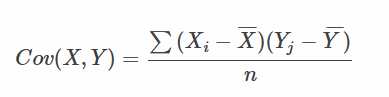

In [ ]:
#calculate covariance between x & y
def covariance(x,y):
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  covar = 0.0

  for i in range(len(x)):
    covar += (x[i] - mean_x) * (y[i] - mean_y)

  return covar/len(x)

covar_xy= covariance(data['X'], data['Y'])
print(f'Cov(X,Y) : {covar_xy}')


Cov(X,Y) : 1832.0543461829182


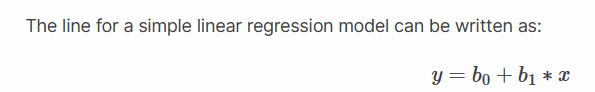

In [ ]:
# Estimate Coefficients

b1 = covar_xy / var_x
b0 = mean_y - b1 * mean_x

print(f'Coefficents :\n b0: {b0} b1 : {b1}')

Coefficents :
 b0: 19.99448575911478 b1 : 3.413823560066368


In [ ]:
#prediction

x = data['X'].values.copy()

x

array([108,  19,  13, 124,  40,  57,  23,  14,  45,  10,   5,  48,  11,
        23,   7,   2,  24,   6,   3,  23,   6,   9,   9,   3,  29,   7,
         4,  20,   7,   4,   0,  25,   6,   5,  22,  11,  61,  12,   4,
        16,  13,  60,  41,  37,  55,  41,  11,  27,   8,   3,  17,  13,
        13,  15,   8,  29,  30,  24,   9,  31,  14,  53,  26])

In [ ]:
#prediction

x = data['X'].values.copy()

print(f'x: {x}')

y_hat = b0 + b1 * x

print(f'\n\ny_hat: {y_hat}')

x: [108  19  13 124  40  57  23  14  45  10   5  48  11  23   7   2  24   6
   3  23   6   9   9   3  29   7   4  20   7   4   0  25   6   5  22  11
  61  12   4  16  13  60  41  37  55  41  11  27   8   3  17  13  13  15
   8  29  30  24   9  31  14  53  26]


y_hat: [388.68743025  84.8571334   64.37419204 443.30860721 156.54742816
 214.58242868  98.51242764  67.7880156  173.61654596  54.13272136
  37.06360356 183.85801664  57.54654492  98.51242764  43.89125068
  26.82213288 101.9262512   40.47742712  30.23595644  98.51242764
  40.47742712  50.7188978   50.7188978   30.23595644 118.995369
  43.89125068  33.64978     88.27095696  43.89125068  33.64978
  19.99448576 105.34007476  40.47742712  37.06360356  95.09860408
  57.54654492 228.23772292  60.96036848  33.64978     74.61566272
  64.37419204 224.82389936 159.96125172 146.30595748 207.75478156
 159.96125172  57.54654492 112.16772188  47.30507424  30.23595644
  78.02948628  64.37419204  64.37419204  71.20183916  47.30507424
 118.99536

In [ ]:
y = data['Y'].values
print(f'\n\ny: {y}')



y: [392.5  46.2  15.7 422.2 119.4 170.9  56.9  77.5 214.   65.3  20.9 248.1
  23.5  39.6  48.8   6.6 134.9  50.9   4.4 113.   14.8  48.7  52.1  13.2
 103.9  77.5  11.8  98.1  27.9  38.1   0.   69.2  14.6  40.3 161.5  57.2
 217.6  58.1  12.6  59.6  89.9 202.4 181.3 152.8 162.8  73.4  21.3  92.6
  76.1  39.9 142.1  93.   31.9  32.1  55.6 133.3 194.5 137.9  87.4 209.8
  95.5 244.6 187.5]


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=data['X'], y=data['Y'], name='train', mode='markers', marker_color='rgba(152, 0, 0, .8)'))
fig.add_trace(go.Scatter(x=data['X'], y=y_hat, name='prediction', mode='lines+markers', marker_color='rgba(0, 152, 0, .8)'))

fig.update_layout(title = f'Swedish Automobiles Data\n (visual comparison for correctness)',title_x=0.5, xaxis_title= "Number of Claims", yaxis_title="Payment in Claims")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

**mean squared error (MSE)**